In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
file=pd.DataFrame({'x1':[4,2,1,3,1,6],'x2':[1,8,0,2,4,7],'y':[2,-14,1,-1,-7,-8]})

In [3]:
X1 = file["x1"]
X2 = file["x2"]
Y = file["y"]
X2 = np.array(X2)
X1 = np.array(X1)
Y = np.array(Y)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def compute_loss(y_true, y_pred):
    epsilon = 1e-9
    y1 = y_true * np.log(y_pred + epsilon)
    y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
    return -np.mean(y1 + y2)

In [6]:
b1 = 0
b2 = 0
b0 = 0
L = 0.001
log = []
for _ in range(1000):
    errors = sigmoid(b0 + b1 * X1 + b2 * X2) - Y
    b0 -= L * np.sum(errors) / len(X1)
    b1 -= L * np.sum(errors * X1) / len(X1)
    b2 -= L * np.sum(errors * X2) / len(X2)
    y_p = sigmoid(b0+b1*X1+b2*X2)
    loss = compute_loss(Y, y_p)
    log.append(loss)

Y_pred_sigmoid = sigmoid(b0 + b1 * X1 + b2 * X2)
print(b0, b1, b2)

-4.510594002763053 -12.852387654592796 -32.67948211568255


In [7]:
rmse = root_mean_squared_error(Y, Y_pred_sigmoid)
mse = mean_squared_error(Y, Y_pred_sigmoid)
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

RMSE: 7.2456883724323164
MSE: 52.49999999040087


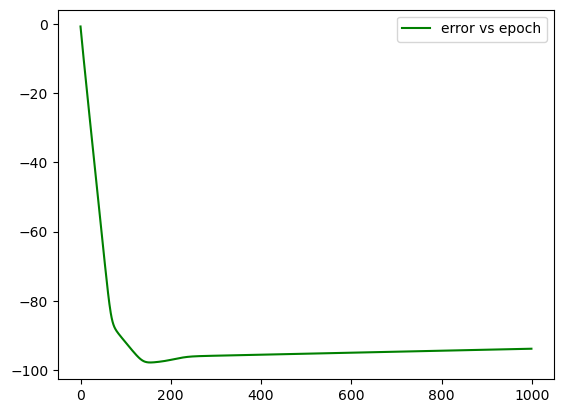

In [8]:
plt.plot(range(1000), log, color="green", label="error vs epoch")
plt.legend()
plt.show()